In [2]:
import pandas as pd

pbmc = pd.read_csv('normalized_dataset.csv', index_col=0) 

print(pbmc)

            C26_AAACCCACAAGTGACG-1  C26_AAACCCATCAATCGGT-1  \
NOC2L                     0.000000                     0.0   
KLHL17                    0.000000                     0.0   
PLEKHN1                   0.000000                     0.0   
HES4                      0.000000                     0.0   
ISG15                     1.098612                     0.0   
...                            ...                     ...   
ADAMTS5                   0.000000                     0.0   
ERG                       0.000000                     0.0   
FAM3B                     0.000000                     0.0   
RSPH1                     0.000000                     0.0   
AC145212.1                0.000000                     0.0   

            C26_AAACCCATCGAACGGA-1  C26_AAACGAACAACGATTC-1  \
NOC2L                     0.000000                0.693147   
KLHL17                    0.000000                0.000000   
PLEKHN1                   0.000000                0.000000   
HES4   

In [3]:
# Veri çerçevesinin sütunlarını ve satırlarını değiştirme
transposed_pbmc = pbmc.transpose()

# Sonucu göster
print(transposed_pbmc)


                           NOC2L    KLHL17  PLEKHN1  HES4     ISG15  AGRN  \
C26_AAACCCACAAGTGACG-1  0.000000  0.000000      0.0   0.0  1.098612   0.0   
C26_AAACCCATCAATCGGT-1  0.000000  0.000000      0.0   0.0  0.000000   0.0   
C26_AAACCCATCGAACGGA-1  0.000000  0.000000      0.0   0.0  1.098612   0.0   
C26_AAACGAACAACGATTC-1  0.693147  0.000000      0.0   0.0  0.693147   0.0   
C26_AAACGAACAAGTGGGT-1  0.000000  0.000000      0.0   0.0  0.693147   0.0   
...                          ...       ...      ...   ...       ...   ...   
C27_TTTGGTTTCTGGGCCA-1  0.000000  0.000000      0.0   0.0  0.000000   0.0   
C27_TTTGTTGAGCAGCGAT-1  0.000000  0.000000      0.0   0.0  0.000000   0.0   
C27_TTTGTTGGTGGATCAG-1  0.693147  0.000000      0.0   0.0  0.000000   0.0   
C27_TTTGTTGTCAGCGGAA-1  0.000000  0.000000      0.0   0.0  0.000000   0.0   
C27_TTTGTTGTCTTGTTAC-1  0.000000  0.693147      0.0   0.0  0.000000   0.0   

                        C1orf159  TTLL10  TNFRSF18  TNFRSF4  ...  FAM83F  \

In [4]:
# İstenen gen listesi
istenilen_genler = ["ARF6", "CD37", "CD63", "CD81", "CD9", "CHMP1A", "CHMP1B", "CHMP2A", "CHMP2B", "CHMP3", "CHMP4A", "CHMP4B", "CHMP5", "CHMP6", "HGS", "HSP90AA1", "HSPA4", "HSPA8", "HSPD1", "MVB12A", "MVB12B", "PDCD6", "PDCD6IP", "SDCBP", "SNF8", "STAM", "STAM2", "TSG101", "VPS25", "VPS36", "VPS37A", "VPS37B", "VPS37C", "VPS37D", "VPS4A", "VTA1"]



# İstenilen genlerin olduğu sütunları filtrele
filtered_pbmc = transposed_pbmc[istenilen_genler]

# Sonucu göster
print(filtered_pbmc)

                            ARF6      CD37      CD63      CD81  CD9    CHMP1A  \
C26_AAACCCACAAGTGACG-1  1.098612  1.098612  0.000000  0.000000  0.0  0.000000   
C26_AAACCCATCAATCGGT-1  0.693147  0.000000  0.000000  0.000000  0.0  0.000000   
C26_AAACCCATCGAACGGA-1  1.098612  1.945910  0.000000  0.000000  0.0  0.000000   
C26_AAACGAACAACGATTC-1  0.693147  0.000000  1.945910  1.791759  0.0  0.000000   
C26_AAACGAACAAGTGGGT-1  0.000000  1.609438  0.000000  1.386294  0.0  0.000000   
...                          ...       ...       ...       ...  ...       ...   
C27_TTTGGTTTCTGGGCCA-1  0.693147  0.693147  0.000000  0.000000  0.0  0.000000   
C27_TTTGTTGAGCAGCGAT-1  1.386294  1.386294  0.000000  0.000000  0.0  0.000000   
C27_TTTGTTGGTGGATCAG-1  0.000000  1.098612  0.000000  0.000000  0.0  0.000000   
C27_TTTGTTGTCAGCGGAA-1  0.000000  0.000000  0.000000  1.098612  0.0  0.000000   
C27_TTTGTTGTCTTGTTAC-1  2.397895  2.079442  1.386294  1.098612  0.0  0.693147   

                          C

In [5]:

from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Let's store the row names
row_names = filtered_pbmc.index.tolist()

# Use the DataFrame containing only gene expressions
gen_expression_only = filtered_pbmc.values

# Create the PCA model
pca = PCA(n_components=36)  # Let's take a total of 36 components

# Apply the PCA model to the dataset and make it compatible
pca.fit(gen_expression_only)

# Create a DataFrame containing the PCA results
pca_result = pd.DataFrame(pca.transform(gen_expression_only), columns=[f'PC{i+1}' for i in range(36)])

# Add back the row names
pca_result.index = row_names

# Display the DataFrame showing PC values for each cell
print(pca_result)


                             PC1       PC2       PC3       PC4       PC5  \
C26_AAACCCACAAGTGACG-1 -1.079428  0.127377  0.124078  0.973318 -0.223977   
C26_AAACCCATCAATCGGT-1 -0.933829 -0.948897  0.870115  1.114981 -0.611825   
C26_AAACCCATCGAACGGA-1  0.023895 -0.092864 -0.839325 -0.797643 -0.020027   
C26_AAACGAACAACGATTC-1  1.362310 -0.448633  0.497512  1.119347  0.824230   
C26_AAACGAACAAGTGGGT-1  0.535207  0.021243 -1.101008 -0.489067 -0.037480   
...                          ...       ...       ...       ...       ...   
C27_TTTGGTTTCTGGGCCA-1 -0.681122 -0.476784 -0.367395  0.945099 -0.069413   
C27_TTTGTTGAGCAGCGAT-1 -0.543831 -0.280953  0.957175 -0.765241  0.006890   
C27_TTTGTTGGTGGATCAG-1 -0.683248 -0.653175 -0.599399  0.044307  0.044918   
C27_TTTGTTGTCAGCGGAA-1  0.797236 -0.836794 -0.412972  0.988625 -1.309458   
C27_TTTGTTGTCTTGTTAC-1  0.124889  1.419190  0.362675  0.428405  1.938800   

                             PC6       PC7       PC8       PC9      PC10  ...  \
C26_AA

In [6]:
print(pca.singular_values_)

[72.76855399 64.25242252 61.68147973 54.5648144  53.23998223 48.43678605
 45.80626787 44.21399815 42.35341602 39.93399142 37.84022235 37.08758594
 36.44192292 36.1757404  35.14594994 34.29997846 33.42589722 31.133691
 30.31075979 29.25675823 28.41752448 26.07237752 24.31150322 23.64029883
 23.17303302 22.59383439 22.4743385  22.18718271 21.88797071 19.69349627
 19.52697078 17.0810508  15.57651359 10.87169364  7.98175885  4.41376094]


In [21]:
print(pca.explained_variance_ratio_)

[0.1121617  0.08744523 0.08058731 0.06306414 0.06003893 0.04969443
 0.04444336 0.04140728 0.03799566 0.03377867 0.03032945 0.02913495
 0.02812935 0.02771992 0.02616421 0.02491981 0.02366591 0.02053139
 0.01946035 0.01813049 0.01710526 0.01439854 0.01251932 0.01183758
 0.01137425 0.01081277 0.0106987  0.01042705 0.01014771 0.00821491
 0.00807657 0.00617997 0.00513922 0.00250352 0.00134944 0.00041264]


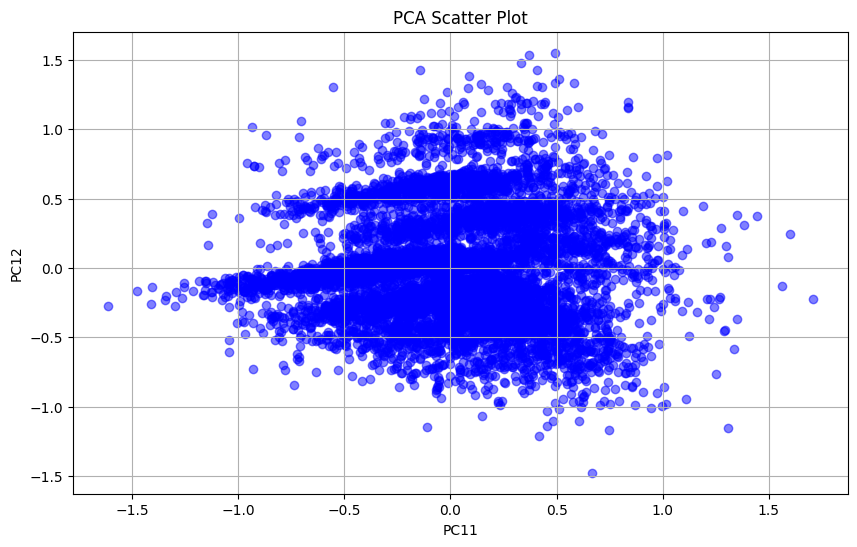

In [7]:
import matplotlib.pyplot as plt

# PCA bileşenlerini seçme
component1 = 'PC11'
component2 = 'PC12'

# PCA sonuçlarından PC1 ve PC2'yi alın
x = pca_result[component1]
y = pca_result[component2]

# Scatter plot oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('PCA Scatter Plot')
plt.xlabel(component1)
plt.ylabel(component2)
plt.grid(True)
plt.show()


In [8]:
#eliminate PC1 and PC2 for prepearing randomforest
pca_result_modified = pca_result.drop(columns=['PC1', 'PC2'])

pca_result_modified = pca_result_modified.iloc[:, :10]

print(pca_result_modified)

                             PC3       PC4       PC5       PC6       PC7  \
C26_AAACCCACAAGTGACG-1  0.124078  0.973318 -0.223977 -0.713045  0.368602   
C26_AAACCCATCAATCGGT-1  0.870115  1.114981 -0.611825 -0.321277 -0.517784   
C26_AAACCCATCGAACGGA-1 -0.839325 -0.797643 -0.020027 -0.905002  0.559957   
C26_AAACGAACAACGATTC-1  0.497512  1.119347  0.824230  0.878251 -0.161709   
C26_AAACGAACAAGTGGGT-1 -1.101008 -0.489067 -0.037480  0.487628 -0.372159   
...                          ...       ...       ...       ...       ...   
C27_TTTGGTTTCTGGGCCA-1 -0.367395  0.945099 -0.069413 -0.476805  0.310102   
C27_TTTGTTGAGCAGCGAT-1  0.957175 -0.765241  0.006890 -0.689792 -0.340158   
C27_TTTGTTGGTGGATCAG-1 -0.599399  0.044307  0.044918  0.209374  0.352880   
C27_TTTGTTGTCAGCGGAA-1 -0.412972  0.988625 -1.309458  0.194212 -0.233245   
C27_TTTGTTGTCTTGTTAC-1  0.362675  0.428405  1.938800 -0.725620  0.521161   

                             PC8       PC9      PC10      PC11      PC12  
C26_AAACCCAC

In [9]:
import pandas as pd
import joblib

# Eğitilmiş modeli yükleme
loaded_model = joblib.load('random_forest_model.pkl')

# Yeni veri setinden özellikleri seçme
X_new = pca_result_modified.iloc[:, :]

# Test seti üzerinde %votes değerlerini tahmin etme
votes = loaded_model.predict_proba(X_new)

# Her bir hücre ismi için %votes değerlerini içeren bir DataFrame oluşturma
votes_df = pd.DataFrame(data=votes, columns=loaded_model.classes_, index=X_new.index)

# DataFrame'i görüntüleme veya işlem yapma
print(votes_df)
votes_df.to_csv('votes_df_pbmc.csv', index=True)


                        negative  positive
C26_AAACCCACAAGTGACG-1      0.53      0.47
C26_AAACCCATCAATCGGT-1      0.58      0.42
C26_AAACCCATCGAACGGA-1      0.85      0.15
C26_AAACGAACAACGATTC-1      0.75      0.25
C26_AAACGAACAAGTGGGT-1      0.33      0.67
...                          ...       ...
C27_TTTGGTTTCTGGGCCA-1      0.46      0.54
C27_TTTGTTGAGCAGCGAT-1      0.89      0.11
C27_TTTGTTGGTGGATCAG-1      0.49      0.51
C27_TTTGTTGTCAGCGGAA-1      0.53      0.47
C27_TTTGTTGTCTTGTTAC-1      0.58      0.42

[9198 rows x 2 columns]


In [10]:
cell_types = pd.read_csv('cell_types.csv', index_col=0) 

print(cell_types)

                       cellType_final
C26_AAACCCACAAGTGACG-1      CD4-naive
C26_AAACCCATCAATCGGT-1           CD14
C26_AAACCCATCGAACGGA-1            CD4
C26_AAACGAACAACGATTC-1             NK
C26_AAACGAACAAGTGGGT-1            CD8
...                               ...
C27_TTTGGTTTCTGGGCCA-1            CD4
C27_TTTGTTGAGCAGCGAT-1      CD14-PPBP
C27_TTTGTTGGTGGATCAG-1      CD4-naive
C27_TTTGTTGTCAGCGGAA-1            CD8
C27_TTTGTTGTCTTGTTAC-1             NK

[9198 rows x 1 columns]


In [11]:
# Yeni bir DataFrame oluşturma ve sıfırlarla doldurma
new_column = pd.DataFrame(index=votes_df.index, columns=["cell_types"])

# Cell_types DataFrame'inin indekslerini kontrol ederek eşleşen satırlara karşılık gelen değerleri atama
for index in cell_types.index:
    if index in votes_df.index:
        new_column.loc[index] = cell_types.loc[index].values[0]

# Yeni sütunu votes_df'e eklemek
votes_df["cell_types"] = new_column

# Oluşturulan DataFrame'i gösterme
print(votes_df)


                        negative  positive cell_types
C26_AAACCCACAAGTGACG-1      0.53      0.47  CD4-naive
C26_AAACCCATCAATCGGT-1      0.58      0.42       CD14
C26_AAACCCATCGAACGGA-1      0.85      0.15        CD4
C26_AAACGAACAACGATTC-1      0.75      0.25         NK
C26_AAACGAACAAGTGGGT-1      0.33      0.67        CD8
...                          ...       ...        ...
C27_TTTGGTTTCTGGGCCA-1      0.46      0.54        CD4
C27_TTTGTTGAGCAGCGAT-1      0.89      0.11  CD14-PPBP
C27_TTTGTTGGTGGATCAG-1      0.49      0.51  CD4-naive
C27_TTTGTTGTCAGCGGAA-1      0.53      0.47        CD8
C27_TTTGTTGTCTTGTTAC-1      0.58      0.42         NK

[9198 rows x 3 columns]


In [17]:
for cell_type in votes_df['cell_types'].unique():
    cell_type_df = votes_df[votes_df['cell_types'] == cell_type]
    positive_over_50 = cell_type_df[cell_type_df['positive'] > 0.50].shape[0]
    total_cells = cell_type_df.shape[0]
    percentage_over_50 = (positive_over_50 / total_cells) * 100
    print(f"{cell_type} hücrelerinin pozitif değeri %50'nin üzerinde olan hücrelerin yüzdesi: {percentage_over_50:.2f}%")

ZeroDivisionError: division by zero

In [12]:

# CD8 hücrelerinin pozitif değeri %50'nin üzerinde olan hücre sayısını bul
cd8_positive_over_50 = votes_df[(votes_df['cell_types'] == 'CD8') & (votes_df['positive'] > 0.20)].shape[0]

# CD8 hücrelerinin negatif değeri %50'nin üzerinde olan hücre sayısını bul
cd8_negative_over_50 = votes_df[(votes_df['cell_types'] == 'CD8') & (votes_df['negative'] > 0.20)].shape[0]

print(f"Pozitif değeri %50'nin üzerinde olan CD8 hücre sayısı: {cd8_positive_over_50}")
print(f"Negatif değeri %50'nin üzerinde olan CD8 hücre sayısı: {cd8_negative_over_50}")

Pozitif değeri %50'nin üzerinde olan CD8 hücre sayısı: 1543
Negatif değeri %50'nin üzerinde olan CD8 hücre sayısı: 2028


In [13]:
positives_over_threshold = votes_df[votes_df['positive'] > 0.5]
count = positives_over_threshold.shape[0]

print("0.5'ten büyük değere sahip pozitif satır sayısı:", count)

0.5'ten büyük değere sahip pozitif satır sayısı: 1760


In [15]:
max_positive_value = votes_df["positive"][votes_df["positive"] > 0].max()
print("En büyük pozitif değer:", max_positive_value)


En büyük pozitif değer: 0.95
